Nama: Lailatul Badriyah

NIM: 2141720036

Absen: 14

Kelas: TI-3H


## Tugas Praktikum

1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).
2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.
3. Lakukan feature scaling jika diperlukan.
4. Buat model multiple linear regression menggunakan Scikit-Learn.
5. Latih model pada data latih dan lakukan prediksi pada data uji.
6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

### Langkah 1: Import Library

In [46]:
# import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

### Langkah 2: Baca Data

In [47]:
# baca data dari file CSV
data = pd.read_csv('data/insurance.csv')

### Langkah 3: Pemahaman Informasi dari Data

In [48]:
# melihat beberapa data awal
data.head()

# mengecek ukuran data
data.shape

# informasi tentang data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Langkah 4: Identifikasi Variabel Bebas dan Variabel Target

Variabel Bebas (Fitur)
1. Age
2. Sex
3. BMI
4. Children
5. Smoker
6. Region

Variabel Target (Biaya Medis Personal)
1. Charges

C:\Users\Lailatul Badriyah\AppData\Local\Temp\ipykernel_18144\4259565641.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)


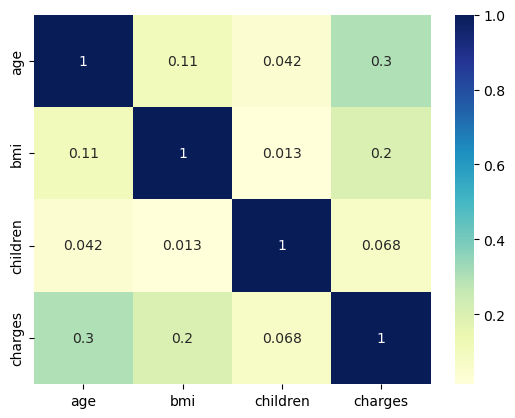

In [49]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

Dari visualisasi heatmap di atas, terlihat bahwa terdapat korelasi yang signifikan antara variabel independen (fitur) dan variabel charge. Variabel-fitur yang memiliki korelasi yang cukup tinggi dengan charge adalah age dan bmi. Oleh karena itu, age dan bmi dipilih sebagai variabel fitur yang akan digunakan dalam analisis lebih lanjut. Namun terdapat variabel lain yang tidak terdeteksi pada visualisasi tersebut yaitu smoker dan sex sehingga perlu dilakukan pemeriksaan lebih mendalam. Untuk melakukan pemeriksaan tersebut, akan dilakukan ploting menggunakan variabel fitur yang memiliki korelasi yang signifikan dengan variabel target yaitu age dan bmi.

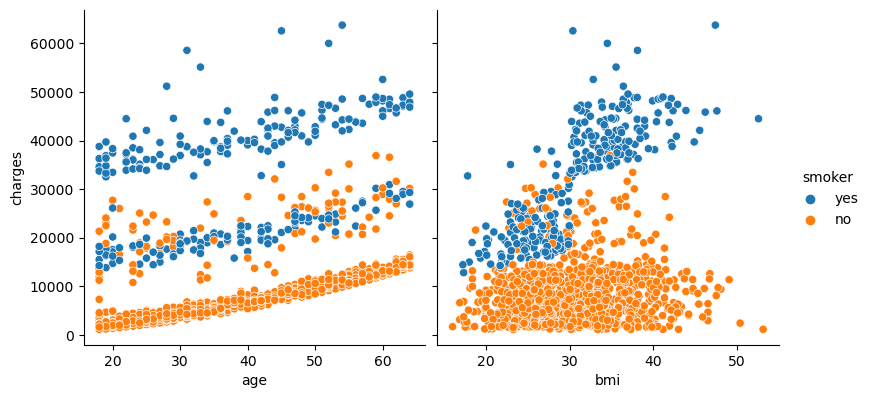

In [50]:
sns.pairplot(data, x_vars=['age', 'bmi'],
            y_vars='charges', height=4, aspect=1, kind='scatter', hue='smoker')
plt.show()

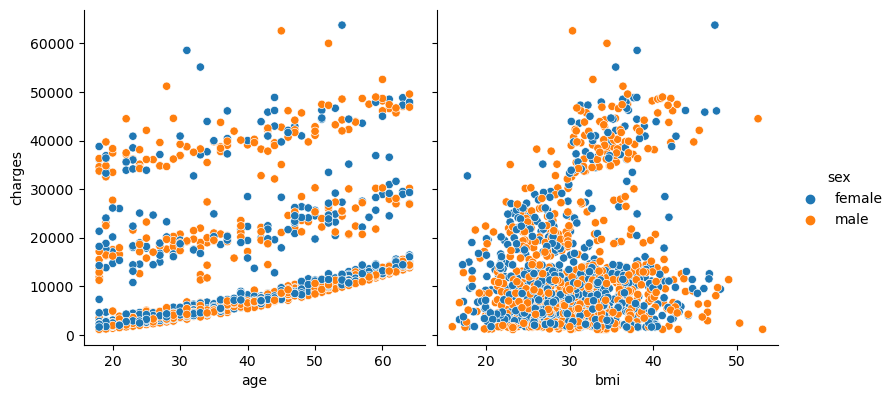

In [51]:
sns.pairplot(data, x_vars=['age', 'bmi'],
            y_vars='charges', height=4, aspect=1, kind='scatter', hue='sex')
plt.show()

Berdasarkan kedua plot di atas, kita dapat melihat bahwa data smoker memiliki distribusi yang lebih tersegmentasi, yang berarti bahwa perokok cenderung memiliki charges yang lebih tinggi daripada yang bukan perokok. Namun, ketika kita melihat variabel sex, tidak terlihat pengaruh yang signifikan karena persebarannya tidak begitu berbeda dengan jelas antara jenis kelamin pria dan wanita.

### Langkah 5: Melakukan Encoding pada Data Smoker

Karena data smoker bukan merupakan data numerik, maka perlu dilakukan konversi data smoker menjadi data numerik dengan menggunakan metode encoding.

In [52]:
le = LabelEncoder()

data['smoker'] = le.fit_transform(data['smoker'])

### Langkah 6: Membagi Dataset

Pada pembagian dataset ini, saya membagu data menjadi data latih (80%) dan data uji (20%) menggunakan train_test_split.

In [53]:
X = data[['age', 'bmi', 'smoker']]
y = data['charges']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

### Langkah 7: Melakukan Feature Scaling

Feature scaling tidak diperlukan untuk Regresi Linier karena algoritma tersebut tidak sensitif terhadap skala.

### Langkah 8: Membuat Model Multiple Linear Regression

In [55]:
model = LinearRegression()
model.fit(X_train, y_train)

coef = model.coef_
intercept = model.intercept_
print(f'Koefisien: {coef}')
print(f'Intercept: {intercept}')

Koefisien: [  266.10629404   299.33904434 23499.67317566]
Intercept: -11170.51445359007


In [56]:
y_pred = model.predict(X_test)

### Langkah 9: Evaluasi Model dengan Menggunakan Metrik R-squared, MSE, dan MAE

In [57]:
# menghitung MAE
mae = mean_absolute_error(y_test, y_pred)

# menghitung MSE
mse = mean_squared_error(y_test, y_pred)

# menghitung R-squared
r2 = r2_score(y_test, y_pred)

print("R-squared:", r2)
print("MSE:", mse)
print("MAE:", mae)

R-squared: 0.7916580391198964
MSE: 32669703.021733698
MAE: 3927.5850813981424
